In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
df = pd.read_csv('train.csv')
print(f'shape of training data is: {df.shape}')

shape of training data is: (165034, 14)


In [40]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [41]:
df.drop(columns=["Surname"], inplace=True)

In [42]:
df.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [43]:
missing_data = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_columns = missing_data[missing_data > 0]
missing_data=pd.concat([missing_data,percent],axis=1, keys=['Total','Percent'])

In [44]:
missing_data.head()

,Total,Percent
id,0,0.0
CustomerId,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0


In [45]:
numerical_features = df.select_dtypes(include=["number"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 16.4+ MB


In [47]:
obj_col=df.select_dtypes(include=["object"]).columns
obj_col = pd.DataFrame(obj_col,columns=["Object column"])
print(f"number of column that have text => {obj_col.shape}")
obj_col

number of column that have text => (2, 1)


,Object column
0,Geography
1,Gender


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
# split data to features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

# split data to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the XGBoost model
model = XGBClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score on the validation set
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"Best AUC-ROC Score on Validation Set: {auc_roc}")

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Best AUC-ROC Score on Validation Set: 0.8901525853666609
Best Hyperparameters:
{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}


In [52]:
print(y_pred_proba)

[0.13095832 0.01701397 0.82543516 ... 0.18198007 0.01429647 0.02207174]


In [53]:
print(y_test)

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


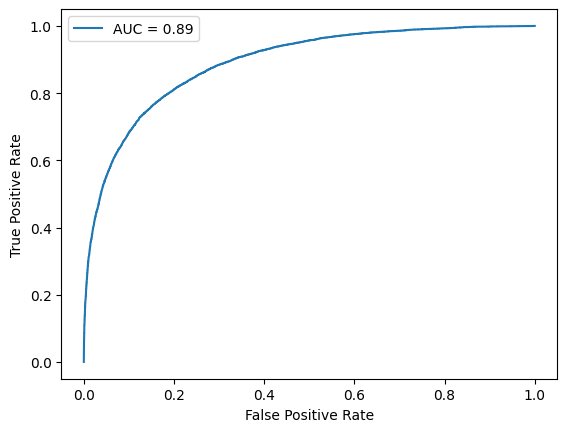

AUC-ROC Score: 0.8902


In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print the AUC-ROC score
print(f'AUC-ROC Score: {roc_auc:.4f}')


In [55]:
import joblib


In [56]:
model=joblib.dump(best_model,'model3.pkl')

In [57]:
print(df.shape)

(165034, 13)
